In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd


In [135]:
df=pd.read_csv(r'C:\Users\a.macchia\Desktop\RAG\mission_launches.csv')

In [136]:
df.shape

(4324, 9)

In [137]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [138]:
df["Mission_Status"].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [139]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [140]:
df['Organisation'].value_counts()

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

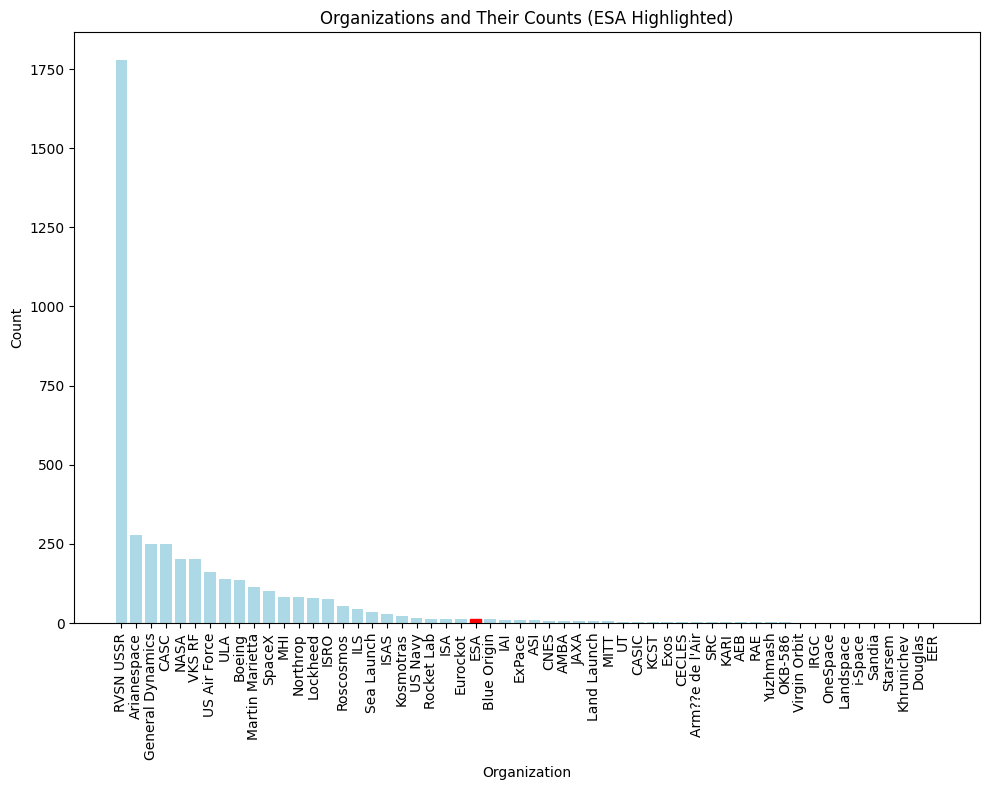

In [141]:
# Data
organizations = np.array(df['Organisation'].value_counts().index)
counts = np.array(df['Organisation'].value_counts())

# Highlight ESA
highlight = "ESA"
highlight_color = 'red'

# Plot
plt.figure(figsize=(10, 8))
bars = plt.bar(organizations, counts, color='lightblue')

# Highlight ESA in red
for bar, org in zip(bars, organizations):
    if org == highlight:
        bar.set_color(highlight_color)

# Rotate labels for better visibility
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Organization')
plt.ylabel('Count')
plt.title('Organizations and Their Counts (ESA Highlighted)')

# Show plot
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

In [142]:
df["Location"][0]

'LC-39A, Kennedy Space Center, Florida, USA'

In [143]:
df[['Launch Pad', 'Location Name', 'State', 'Country']] = df['Location'].str.split(',', expand=True)

In [144]:
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,None


In [145]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Launch Pad           0
Location Name        0
State               23
Country           2674
dtype: int64

In [146]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,None
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,None
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA


In [147]:
# Filtrare le righe dove la colonna 'Country' è NaN
df_no_country = df[df['State'].isna()]

# Visualizzare il risultato
df_no_country.head(10)


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country
26,26,26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.3,Success,Xichang Satellite Launch Center,China,None,None
35,35,35,IRGC,"Launch Plateform, Shahrud Missile Test Site","Wed Apr 22, 2020 03:59 UTC",Qased | Noor 1,StatusActive,NaN,Success,Launch Plateform,Shahrud Missile Test Site,None,None
75,75,75,ExPace,"Taiyuan Satellite Launch Center, China","Sat Dec 07, 2019 02:55 UTC",Kuaizhou 1A | Jilin-1 Gaofen-02B,StatusActive,NaN,Success,Taiyuan Satellite Launch Center,China,None,None
133,133,133,CASC,"Tai Rui Barge, Yellow Sea","Wed Jun 05, 2019 04:06 UTC",Long March 11H | Jilin-1 & Others,StatusActive,5.3,Success,Tai Rui Barge,Yellow Sea,None,None
143,143,143,CASC,"Taiyuan Satellite Launch Center, China","Mon Apr 29, 2019 22:52 UTC",Long March 4B | Tianhui-2 Group 01,StatusActive,64.68,Success,Taiyuan Satellite Launch Center,China,None,None
218,218,218,CASC,"Taiyuan Satellite Launch Center, China","Fri Sep 07, 2018 03:15 UTC",Long March 2C | Haiyang 1C (HY-1C),StatusActive,30.8,Success,Taiyuan Satellite Launch Center,China,None,None
273,273,273,JAXA,"Uchinoura Space Center, Japan","Sat Feb 03, 2018 05:03 UTC",SS-520 | Tricom-1R,StatusActive,NaN,Success,Uchinoura Space Center,Japan,None,None
377,377,377,JAXA,"Uchinoura Space Center, Japan","Sat Jan 14, 2017 23:33 UTC",SS-520 | TRICOM-1,StatusActive,NaN,Failure,Uchinoura Space Center,Japan,None,None
587,587,587,CASIC,"Jiuquan Satellite Launch Center, China","Wed Sep 25, 2013 04:37 UTC",Kuaizhou 1 | Kuaizhou 1,StatusRetired,NaN,Success,Jiuquan Satellite Launch Center,China,None,None
924,924,924,MITT,"Svobodny Cosmodrome, Russia","Tue Apr 25, 2006 16:47 UTC",Start-1 | EROS B,StatusActive,NaN,Success,Svobodny Cosmodrome,Russia,None,None


In [148]:
# Riempi le righe con 'Location Name' se 'State' o entrambe 'State' e 'Country' sono vuoti
df['State'] = df.apply(lambda row: row['Location Name'] if pd.isna(row['State'])  else row['State'], axis=1)
# Ora riempiamo i valori 'Country' che sono NaN con il valore di 'State'
df['Country'] = df.apply(lambda row: row['State'] if pd.isna(row['Country']) else row['Country'], axis=1)

In [149]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA


In [150]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Launch Pad           0
Location Name        0
State                0
Country              0
dtype: int64

In [151]:
#rimozione colonna Location perchè sostituita
data = df.drop(columns=['Location'])
data= data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [152]:
data.head(10)

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA
1,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan
4,ULA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA
5,CASC,"Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,LC-9,Taiyuan Satellite Launch Center,China,China
6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Site 31/6,Baikonur Cosmodrome,Kazakhstan,Kazakhstan
7,CASC,"Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,LC-101,Wenchang Satellite Launch Center,China,China
8,SpaceX,"Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,SLC-40,Cape Canaveral AFS,Florida,USA
9,JAXA,"Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,LA-Y1,Tanegashima Space Center,Japan,Japan


In [153]:
data["Date"][0]

'Fri Aug 07, 2020 05:12 UTC'

In [154]:
def safe_convert_to_datetime(date_str):
    try:
        # Tentiamo di convertire con il formato completo
        return pd.to_datetime(date_str, format='%a %b %d, %Y %H:%M UTC', errors='raise')
    except Exception:
        try:
            # Se il formato completo fallisce, proviamo con il formato più semplice (senza ora e fuso orario)
            return pd.to_datetime(date_str, format='%a %b %d, %Y', errors='raise')
        except Exception:
            # Se entrambi i tentativi falliscono, lasciamo la data originale
            return date_str

# Applicare la funzione di conversione
data['Parsed Date'] = data['Date'].apply(safe_convert_to_datetime)



In [155]:
data.head(10)

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Parsed Date
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,2020-08-07 05:12:00
1,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,2020-08-06 04:01:00
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,2020-08-04 23:57:00
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,2020-07-30 21:25:00
4,ULA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,2020-07-30 11:50:00
5,CASC,"Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,LC-9,Taiyuan Satellite Launch Center,China,China,2020-07-25 03:13:00
6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Site 31/6,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,2020-07-23 14:26:00
7,CASC,"Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,LC-101,Wenchang Satellite Launch Center,China,China,2020-07-23 04:41:00
8,SpaceX,"Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,SLC-40,Cape Canaveral AFS,Florida,USA,2020-07-20 21:30:00
9,JAXA,"Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,LA-Y1,Tanegashima Space Center,Japan,Japan,2020-07-19 21:58:00


In [156]:
data.isna().sum()

Organisation         0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Launch Pad           0
Location Name        0
State                0
Country              0
Parsed Date          0
dtype: int64

In [157]:
# Estrazione delle informazioni (solo per le righe valide)
data['Day of Week'] = pd.to_datetime(data['Parsed Date'], errors='coerce').dt.day_name()
data['Month'] = pd.to_datetime(data['Parsed Date'], errors='coerce').dt.month_name()
data['Day'] = pd.to_datetime(data['Parsed Date'], errors='coerce').dt.day
data['Year'] = pd.to_datetime(data['Parsed Date'], errors='coerce').dt.year
data['Time'] = pd.to_datetime(data['Parsed Date'], errors='coerce').dt.strftime('%H:%M')

In [158]:
data.head(10)

,Organisation,Date,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Parsed Date,Day of Week,Month,Day,Year,Time
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,2020-08-07 05:12:00,Friday,August,7,2020,05:12
1,CASC,"Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,2020-08-06 04:01:00,Thursday,August,6,2020,04:01
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,2020-08-04 23:57:00,Tuesday,August,4,2020,23:57
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,2020-07-30 21:25:00,Thursday,July,30,2020,21:25
4,ULA,"Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,2020-07-30 11:50:00,Thursday,July,30,2020,11:50
5,CASC,"Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,LC-9,Taiyuan Satellite Launch Center,China,China,2020-07-25 03:13:00,Saturday,July,25,2020,03:13
6,Roscosmos,"Thu Jul 23, 2020 14:26 UTC",Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Site 31/6,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,2020-07-23 14:26:00,Thursday,July,23,2020,14:26
7,CASC,"Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success,LC-101,Wenchang Satellite Launch Center,China,China,2020-07-23 04:41:00,Thursday,July,23,2020,04:41
8,SpaceX,"Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,SLC-40,Cape Canaveral AFS,Florida,USA,2020-07-20 21:30:00,Monday,July,20,2020,21:30
9,JAXA,"Sun Jul 19, 2020 21:58 UTC",H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,LA-Y1,Tanegashima Space Center,Japan,Japan,2020-07-19 21:58:00,Sunday,July,19,2020,21:58


Drop colonne "Date" e "Parsed Date"

In [159]:
data= data.drop(columns=['Date', 'Parsed Date'])

In [160]:
data.head(10)

,Organisation,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time
0,SpaceX,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12
1,CASC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01
2,SpaceX,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57
3,Roscosmos,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25
4,ULA,Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50
5,CASC,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,LC-9,Taiyuan Satellite Launch Center,China,China,Saturday,July,25,2020,03:13
6,Roscosmos,Soyuz 2.1a | Progress MS-15,StatusActive,48.5,Success,Site 31/6,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,23,2020,14:26
7,CASC,Long March 5 | Tianwen-1,StatusActive,NaN,Success,LC-101,Wenchang Satellite Launch Center,China,China,Thursday,July,23,2020,04:41
8,SpaceX,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success,SLC-40,Cape Canaveral AFS,Florida,USA,Monday,July,20,2020,21:30
9,JAXA,H-IIA 202 | Hope Mars Mission,StatusActive,90.0,Success,LA-Y1,Tanegashima Space Center,Japan,Japan,Sunday,July,19,2020,21:58


In [161]:
# Funzione per estrarre le caratteristiche dalla colonna 'Detail'
def extract_rocket_features(detail):
    # Nome del razzo
    rocket_name = detail.split('|')[0].strip() if '|' in detail else detail.strip()
    
    # Tipo di missione (tutto ciò che segue '|' fino a un altro '|' o fine stringa)
    mission_type = detail.split('|')[1].strip() if '|' in detail else None
    
    # Payload (carico utile)
    payload = mission_type.split('&')[-1].strip() if mission_type else None
    
    return rocket_name, mission_type, payload


In [162]:
# Applicare la funzione per estrarre le features dalla colonna 'Detail'
data[['Rocket Name', 'Mission Type', 'Payload']] = df['Detail'].apply(lambda x: pd.Series(extract_rocket_features(x)))


In [163]:
data

,Organisation,Detail,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload
0,SpaceX,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky
1,CASC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT
2,SpaceX,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop
3,Roscosmos,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103
4,ULA,Atlas V 541 | Perseverance,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Wednesday,February,5,1958,07:33,Vanguard,Vanguard TV3BU,Vanguard TV3BU
4320,AMBA,Juno I | Explorer 1,StatusRetired,NaN,Success,LC-26A,Cape Canaveral AFS,Florida,USA,Saturday,February,1,1958,03:48,Juno I,Explorer 1,Explorer 1
4321,US Navy,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Friday,December,6,1957,16:44,Vanguard,Vanguard TV3,Vanguard TV3
4322,RVSN USSR,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Sunday,November,3,1957,02:30,Sputnik 8K71PS,Sputnik-2,Sputnik-2


In [164]:
data.isna().sum()

Organisation         0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
Launch Pad           0
Location Name        0
State                0
Country              0
Day of Week          0
Month                0
Day                  0
Year                 0
Time                 0
Rocket Name          0
Mission Type         0
Payload              0
dtype: int64

In [165]:
data=data.drop(columns=['Detail'])

In [166]:
data

,Organisation,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload
0,SpaceX,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky
1,CASC,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT
2,SpaceX,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop
3,Roscosmos,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103
4,ULA,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Wednesday,February,5,1958,07:33,Vanguard,Vanguard TV3BU,Vanguard TV3BU
4320,AMBA,StatusRetired,NaN,Success,LC-26A,Cape Canaveral AFS,Florida,USA,Saturday,February,1,1958,03:48,Juno I,Explorer 1,Explorer 1
4321,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Friday,December,6,1957,16:44,Vanguard,Vanguard TV3,Vanguard TV3
4322,RVSN USSR,StatusRetired,NaN,Success,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Sunday,November,3,1957,02:30,Sputnik 8K71PS,Sputnik-2,Sputnik-2


In [167]:
df=data

# DATA VISUALIZATION

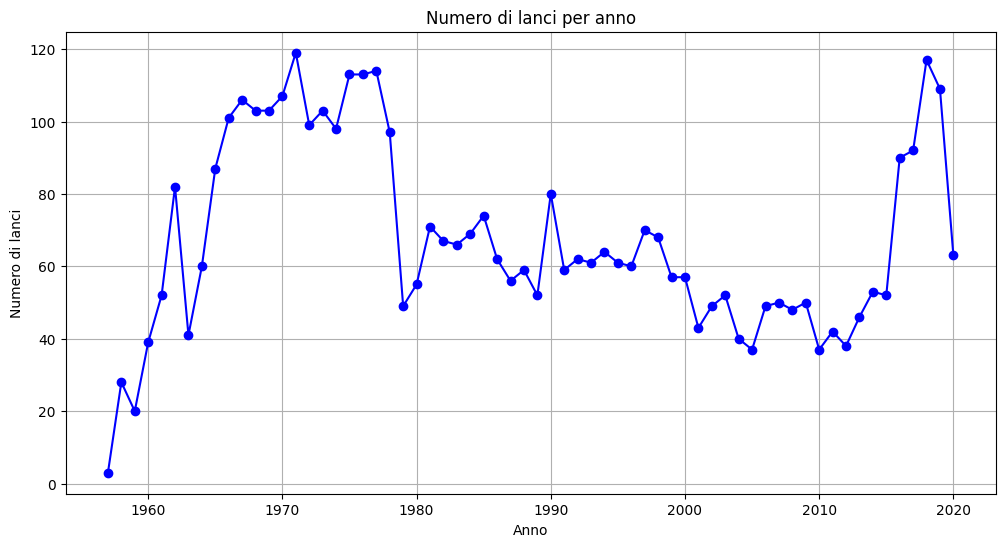

In [168]:
# Conta i lanci per anno
launches_per_year = df['Year'].value_counts().sort_index()

# Creare il time series plot
plt.figure(figsize=(12, 6))
launches_per_year.plot(kind='line', marker='o', color='b')
plt.title("Numero di lanci per anno")
plt.xlabel("Anno")
plt.ylabel("Numero di lanci")
plt.grid(True)
plt.show()


C:\Users\a.macchia\AppData\Local\Temp\ipykernel_32020\2470011042.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=launches_per_country.index, y=launches_per_country.values, palette='coolwarm')


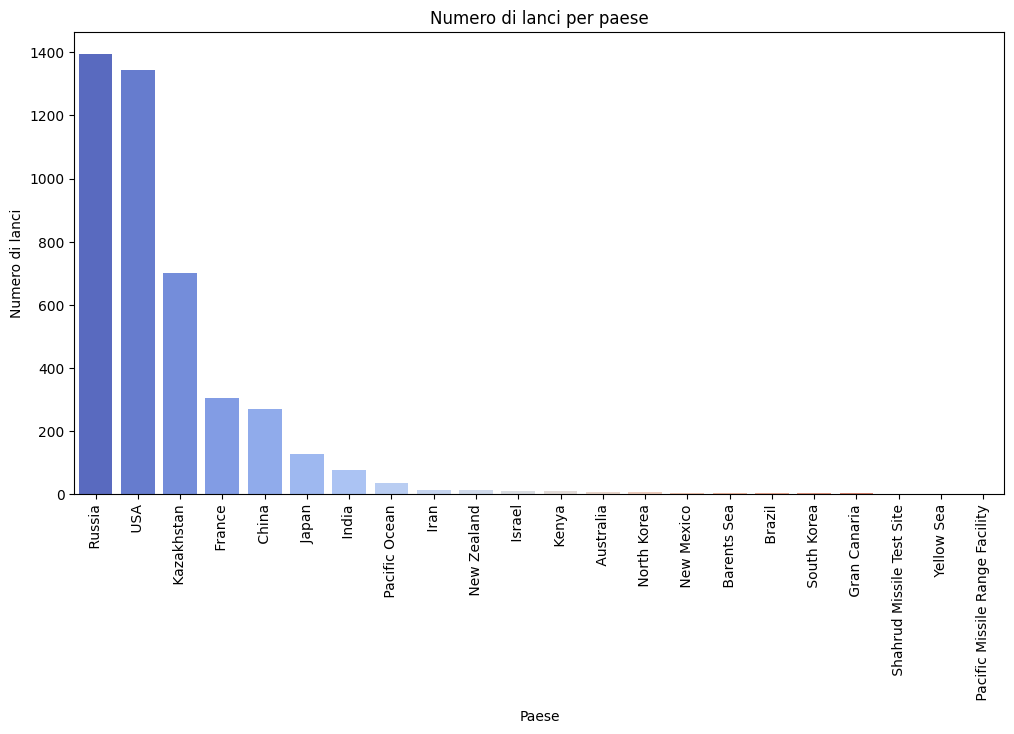

In [169]:
# Conta il numero di lanci per paese
launches_per_country = df['Country'].value_counts()

# Creare un bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=launches_per_country.index, y=launches_per_country.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Numero di lanci per paese")
plt.xlabel("Paese")
plt.ylabel("Numero di lanci")
plt.show()


In [170]:
df.to_csv("dataframe.csv")

[119 117 114 113 113 109 107 106 103 103 103 101  99  98  97  92  90  87
  82  80  74  71  70  69  68  67  66  64  63  62  62  61  61  60  60  59
  59  57  57  56  55  53  52  52  52  52  50  50  49  49  49  48  46  43
  42  41  40  39  38  37  37  28  20   3]


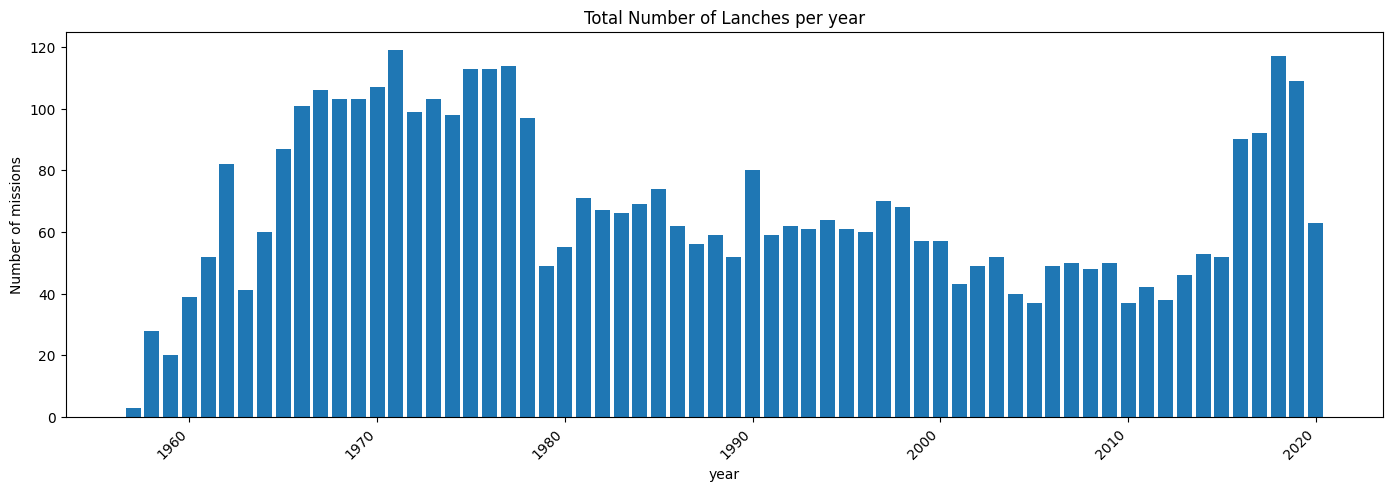

In [171]:
plt.figure(figsize = (17,5))
plt.title('Total Number of Lanches per year')
x=np.array(df['Year'].value_counts().index)
y=np.array(df['Year'].value_counts())
plt.bar(x,y)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('year');
plt.ylabel('Number of missions');
print(y)

plt.show()


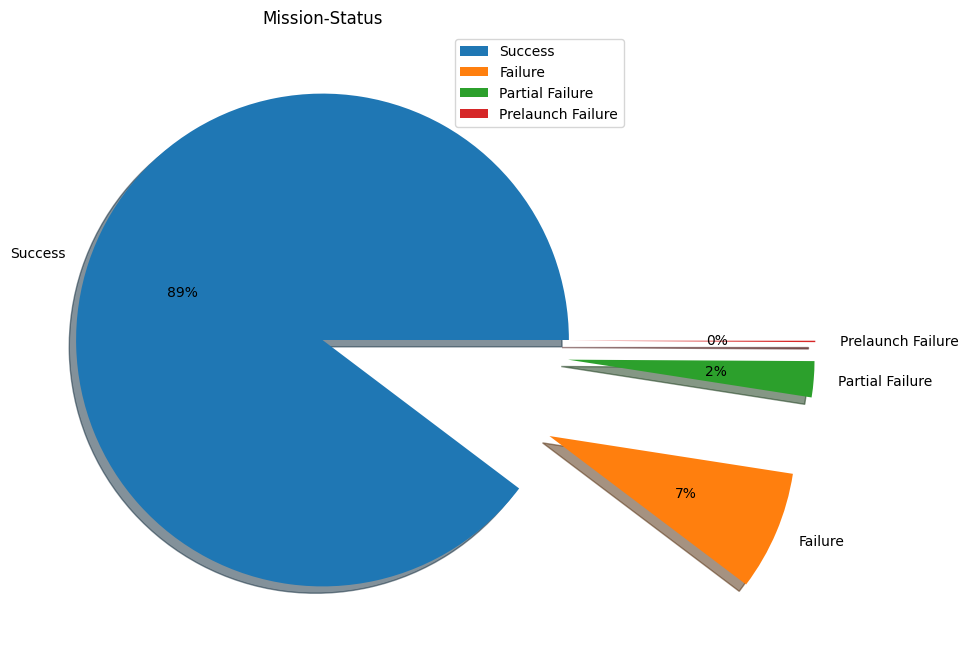

In [172]:
plt.figure(figsize = (8,8))

plt.pie(df['Mission_Status'].value_counts(),autopct='%i%%',labels=df['Mission_Status'].value_counts().index, explode=[0,1,1,1],shadow=True)
plt.title('Mission-Status')
plt.legend()

plt.show()

# Kmeans

In [173]:
df

,Organisation,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload
0,SpaceX,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky
1,CASC,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT
2,SpaceX,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop
3,Roscosmos,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103
4,ULA,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Wednesday,February,5,1958,07:33,Vanguard,Vanguard TV3BU,Vanguard TV3BU
4320,AMBA,StatusRetired,NaN,Success,LC-26A,Cape Canaveral AFS,Florida,USA,Saturday,February,1,1958,03:48,Juno I,Explorer 1,Explorer 1
4321,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Friday,December,6,1957,16:44,Vanguard,Vanguard TV3,Vanguard TV3
4322,RVSN USSR,StatusRetired,NaN,Success,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Sunday,November,3,1957,02:30,Sputnik 8K71PS,Sputnik-2,Sputnik-2


In [174]:
df_kmeans=df

In [175]:
df.head()

,Organisation,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload
0,SpaceX,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky
1,CASC,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT
2,SpaceX,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop
3,Roscosmos,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103
4,ULA,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Rocket_Status   4324 non-null   object
 2   Price           964 non-null    object
 3   Mission_Status  4324 non-null   object
 4   Launch Pad      4324 non-null   object
 5   Location Name   4324 non-null   object
 6   State           4324 non-null   object
 7   Country         4324 non-null   object
 8   Day of Week     4324 non-null   object
 9   Month           4324 non-null   object
 10  Day             4324 non-null   int32 
 11  Year            4324 non-null   int32 
 12  Time            4324 non-null   object
 13  Rocket Name     4324 non-null   object
 14  Mission Type    4324 non-null   object
 15  Payload         4324 non-null   object
dtypes: int32(2), object(14)
memory usage: 506.8+ KB


In [177]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np


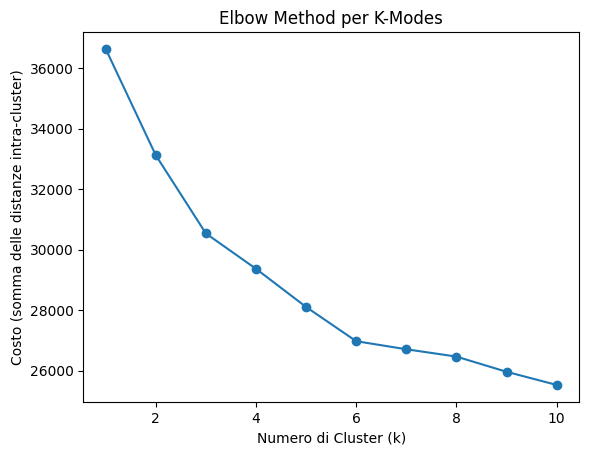

In [178]:
import pandas as pd
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

# Carica il tuo dataset
data = df_kmeans

# Seleziona solo le variabili categoriche (escludi variabili numeriche)
categorical_columns = ['Organisation', 'Rocket_Status', 'Mission_Status', 'Launch Pad', 
                       'Location Name', 'State', 'Country', 'Day of Week', 'Month', 
                       'Rocket Name', 'Mission Type', 'Payload']

# Seleziona solo le variabili categoriche dal dataframe
data_categorical = data[categorical_columns]

# Lista per salvare i costi (somma delle distanze intra-cluster) per ogni valore di k
costs = []

# Prova diversi valori di k (ad esempio, da 1 a 10)
for k in range(1, 11):
    k_modes = KModes(n_clusters=k, init='Cao', n_init=10, verbose=0)
    k_modes.fit(data_categorical)
    
    # Salva il costo (somma delle distanze intra-cluster)
    costs.append(k_modes.cost_)

# Traccia il grafico dell'Elbow Method
plt.plot(range(1, 11), costs, marker='o')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Costo (somma delle distanze intra-cluster)')
plt.title('Elbow Method per K-Modes')
plt.show()


In [179]:
import pandas as pd
from kmodes.kmodes import KModes

# Carica il tuo dataset
data = df_kmeans

# Seleziona solo le variabili categoriche (escludi variabili numeriche)
categorical_columns = ['Organisation', 'Rocket_Status', 'Mission_Status', 'Launch Pad', 
                       'Location Name', 'State', 'Country', 'Day of Week', 'Month', 
                       'Rocket Name', 'Mission Type', 'Payload']

# Seleziona solo le variabili categoriche dal dataframe
data_categorical = data[categorical_columns]

# Crea l'oggetto KModes
k_modes = KModes(n_clusters=3, init='Cao', n_init=10, verbose=1)

# Esegui il clustering
k_modes.fit(data_categorical)

# Aggiungi il cluster risultante al dataset
data['Cluster'] = k_modes.predict(data_categorical)

# Visualizza i primi 5 risultati con il cluster assegnato
print(data[['Organisation', 'Rocket_Status', 'Mission_Status', 'Cluster']].head())


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 125, cost: 30538.0
  Organisation Rocket_Status Mission_Status  Cluster
0       SpaceX  StatusActive        Success        1
1         CASC  StatusActive        Success        1
2       SpaceX  StatusActive        Success        1
3    Roscosmos  StatusActive        Success        2
4          ULA  StatusActive        Success        1


In [180]:
data

,Organisation,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload,Cluster
0,SpaceX,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky,1
1,CASC,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT,1
2,SpaceX,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop,1
3,Roscosmos,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103,2
4,ULA,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Wednesday,February,5,1958,07:33,Vanguard,Vanguard TV3BU,Vanguard TV3BU,1
4320,AMBA,StatusRetired,NaN,Success,LC-26A,Cape Canaveral AFS,Florida,USA,Saturday,February,1,1958,03:48,Juno I,Explorer 1,Explorer 1,1
4321,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Friday,December,6,1957,16:44,Vanguard,Vanguard TV3,Vanguard TV3,1
4322,RVSN USSR,StatusRetired,NaN,Success,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Sunday,November,3,1957,02:30,Sputnik 8K71PS,Sputnik-2,Sputnik-2,2


In [181]:
# 1. Contare i record per ciascun cluster
cluster_counts = data['Cluster'].value_counts()

print("Numero di record per ciascun cluster:")
print(cluster_counts)

Numero di record per ciascun cluster:
Cluster
0    2051
1    1418
2     855
Name: count, dtype: int64


In [182]:
import pandas as pd

# Carica il tuo dataset (assicurati che contenga già la colonna 'Cluster')

# 1. Raggruppare per cluster e vedere la distribuzione di Mission_Status
for cluster in data['Cluster'].unique():
    print(f"\nDistribuzione di Mission_Status per il Cluster {cluster}:")
    cluster_data = data[data['Cluster'] == cluster]
    mission_status_distribution = cluster_data['Mission_Status'].value_counts()
    print(mission_status_distribution)



Distribuzione di Mission_Status per il Cluster 1:
Mission_Status
Success              1243
Failure               139
Partial Failure        34
Prelaunch Failure       2
Name: count, dtype: int64

Distribuzione di Mission_Status per il Cluster 2:
Mission_Status
Success              753
Failure               80
Partial Failure       21
Prelaunch Failure      1
Name: count, dtype: int64

Distribuzione di Mission_Status per il Cluster 0:
Mission_Status
Success              1883
Failure               120
Partial Failure        47
Prelaunch Failure       1
Name: count, dtype: int64


# label encoder

In [183]:
df

,Organisation,Rocket_Status,Price,Mission_Status,Launch Pad,Location Name,State,Country,Day of Week,Month,Day,Year,Time,Rocket Name,Mission Type,Payload,Cluster
0,SpaceX,StatusActive,50.0,Success,LC-39A,Kennedy Space Center,Florida,USA,Friday,August,7,2020,05:12,Falcon 9 Block 5,Starlink V1 L9 & BlackSky,BlackSky,1
1,CASC,StatusActive,29.75,Success,Site 9401 (SLS-2),Jiuquan Satellite Launch Center,China,China,Thursday,August,6,2020,04:01,Long March 2D,Gaofen-9 04 & Q-SAT,Q-SAT,1
2,SpaceX,StatusActive,NaN,Success,Pad A,Boca Chica,Texas,USA,Tuesday,August,4,2020,23:57,Starship Prototype,150 Meter Hop,150 Meter Hop,1
3,Roscosmos,StatusActive,65.0,Success,Site 200/39,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Thursday,July,30,2020,21:25,Proton-M/Briz-M,Ekspress-80 & Ekspress-103,Ekspress-103,2
4,ULA,StatusActive,145.0,Success,SLC-41,Cape Canaveral AFS,Florida,USA,Thursday,July,30,2020,11:50,Atlas V 541,Perseverance,Perseverance,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Wednesday,February,5,1958,07:33,Vanguard,Vanguard TV3BU,Vanguard TV3BU,1
4320,AMBA,StatusRetired,NaN,Success,LC-26A,Cape Canaveral AFS,Florida,USA,Saturday,February,1,1958,03:48,Juno I,Explorer 1,Explorer 1,1
4321,US Navy,StatusRetired,NaN,Failure,LC-18A,Cape Canaveral AFS,Florida,USA,Friday,December,6,1957,16:44,Vanguard,Vanguard TV3,Vanguard TV3,1
4322,RVSN USSR,StatusRetired,NaN,Success,Site 1/5,Baikonur Cosmodrome,Kazakhstan,Kazakhstan,Sunday,November,3,1957,02:30,Sputnik 8K71PS,Sputnik-2,Sputnik-2,2


In [184]:
df["Mission_Status"].value_counts()


Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [185]:
df["Mission_Status"] = df["Mission_Status"].replace({"Partial Failure": "Failure", "Prelaunch Failure": "Failure"})

In [186]:
df["Mission_Status"].value_counts()


Mission_Status
Success    3879
Failure     445
Name: count, dtype: int64

c:\Users\a.macchia\Desktop\RAG\.venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\a.macchia\Desktop\RAG\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\a.macchia\Desktop\RAG\.venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\a.macchia\Desktop\RAG\.venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(


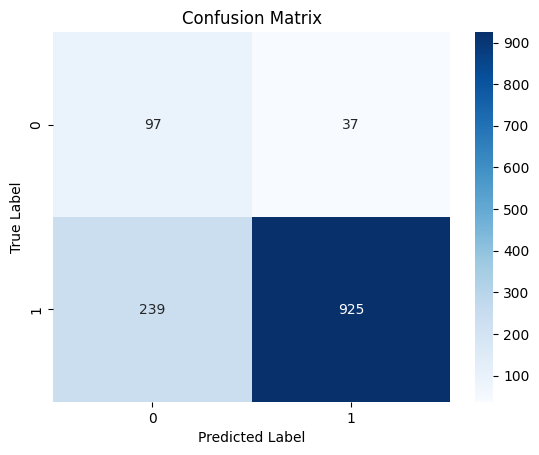

              precision    recall  f1-score   support

           0       0.29      0.72      0.41       134
           1       0.96      0.79      0.87      1164

    accuracy                           0.79      1298
   macro avg       0.63      0.76      0.64      1298
weighted avg       0.89      0.79      0.82      1298



In [187]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inizializzazione del Label Encoder
label_encoders = {}

# Encoding delle variabili categoriche
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salviamo l'encoder per eventuali trasformazioni future

# Gestione dei valori mancanti nella colonna "Price"
imputer = SimpleImputer(strategy="mean")
df["Price"] = imputer.fit_transform(df[["Price"]])

# Definizione della variabile target e delle feature
y = df["Mission_Status"]
X = df.drop(columns=["Mission_Status"])

# Divisione bilanciata in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Impostazione della cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definizione del modello
rf = RandomForestClassifier(class_weight={0: 2, 1: 1},random_state=42)
# Definizione della grid search
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [4,5,6,7],
    "min_samples_split": [1,2],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
y_pred = grid_search.best_estimator_.predict(X_test)

# Stampa della confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Stampa del classification report
print(classification_report(y_test, y_pred))

In [188]:
print(label_encoders["Mission_Status"].classes_)

['Failure' 'Success']


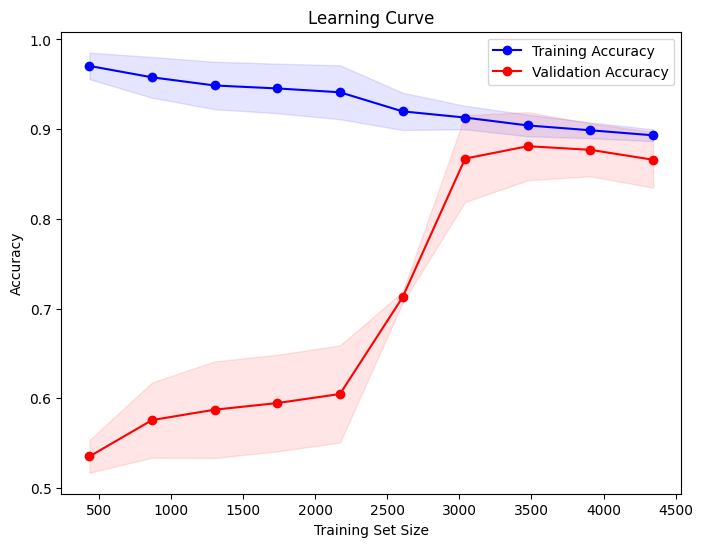

In [189]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    grid_search.best_estimator_, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, "o-", color="blue", label="Training Accuracy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, "o-", color="red", label="Validation Accuracy")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


C:\Users\a.macchia\AppData\Local\Temp\ipykernel_32020\3229101222.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


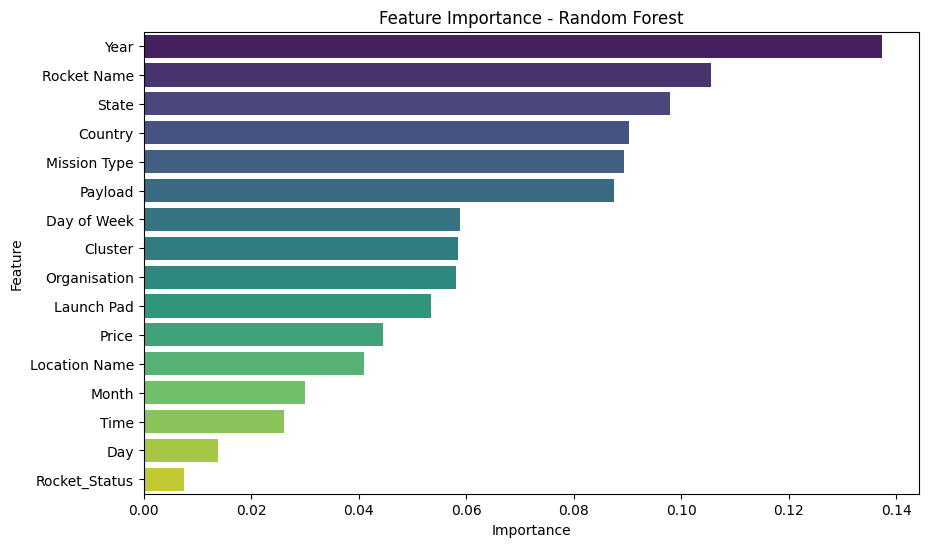

In [190]:
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns

# Creiamo un DataFrame per visualizzare meglio i risultati
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.show()


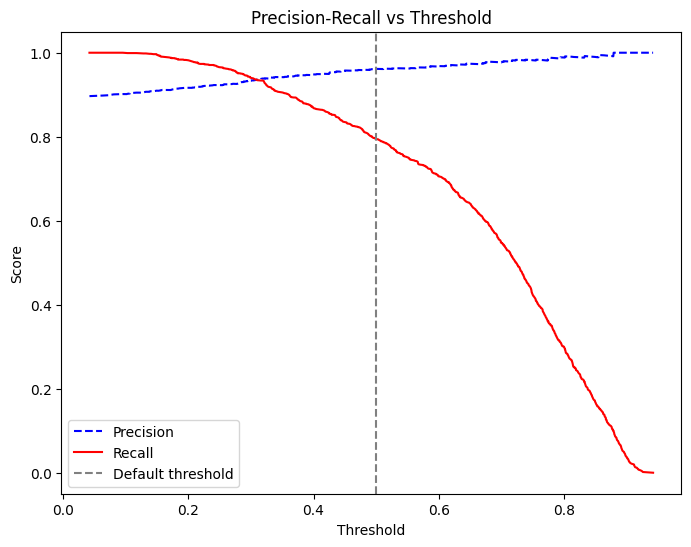

In [192]:
from sklearn.metrics import precision_recall_curve

# Ottieni le probabilità del miglior modello trovato
y_probs = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Calcoliamo la precisione e il recall per varie soglie
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.axvline(x=0.5, color="gray", linestyle="--", label="Default threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold")
plt.show()


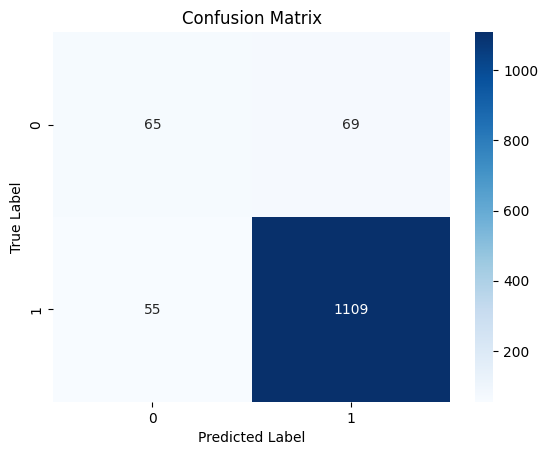

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       134
           1       0.94      0.95      0.95      1164

    accuracy                           0.90      1298
   macro avg       0.74      0.72      0.73      1298
weighted avg       0.90      0.90      0.90      1298



In [193]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inizializzazione del Label Encoder
label_encoders = {}

# Encoding delle variabili categoriche
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salviamo l'encoder per eventuali trasformazioni future

# Gestione dei valori mancanti nella colonna "Price"
imputer = SimpleImputer(strategy="mean")
df["Price"] = imputer.fit_transform(df[["Price"]])

# Definizione della variabile target e delle feature
y = df["Mission_Status"]
X = df.drop(columns=["Mission_Status"])

# Divisione bilanciata in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Impostazione della cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definizione del modello con più parametri di bilanciamento
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Definizione della grid search con parametri ampliati
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [4, 5, 6, 7, 8, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
y_pred = grid_search.best_estimator_.predict(X_test)

# Stampa della confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Stampa del classification report
print(classification_report(y_test, y_pred))


In [194]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

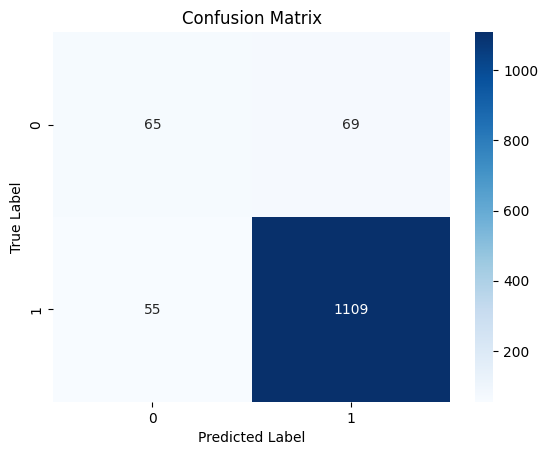

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       134
           1       0.94      0.95      0.95      1164

    accuracy                           0.90      1298
   macro avg       0.74      0.72      0.73      1298
weighted avg       0.90      0.90      0.90      1298



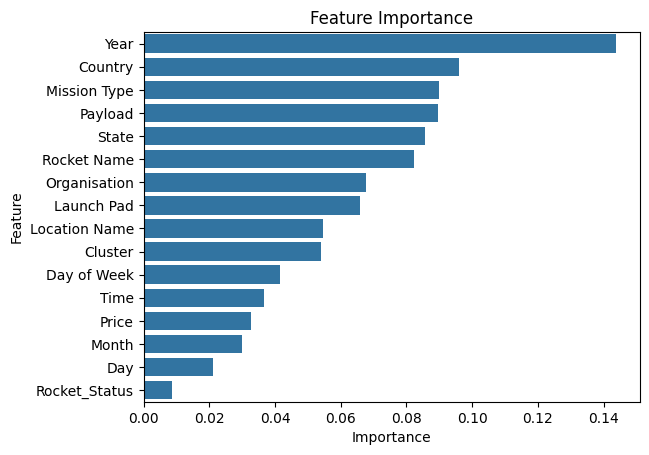

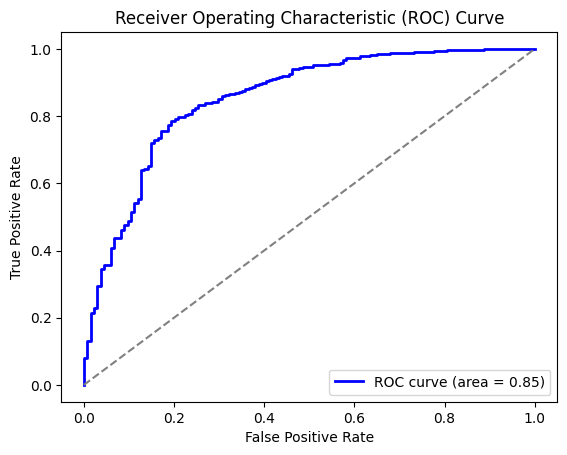

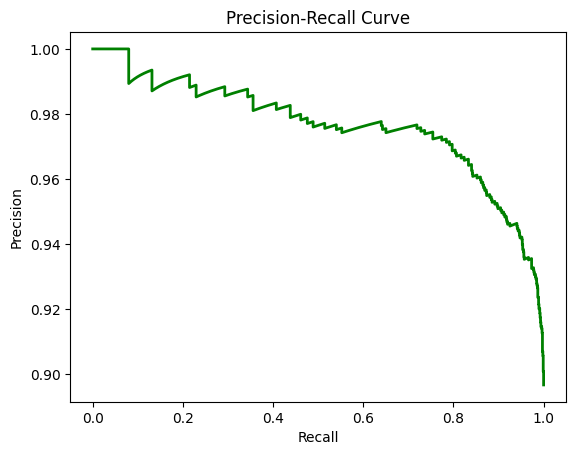

In [195]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inizializzazione del Label Encoder
label_encoders = {}

# Encoding delle variabili categoriche
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salviamo l'encoder per eventuali trasformazioni future

# Gestione dei valori mancanti nella colonna "Price"
imputer = SimpleImputer(strategy="mean")
df["Price"] = imputer.fit_transform(df[["Price"]])

# Definizione della variabile target e delle feature
y = df["Mission_Status"]
X = df.drop(columns=["Mission_Status"])

# Divisione bilanciata in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Impostazione della cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definizione del modello con più parametri di bilanciamento
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Definizione della grid search con parametri ampliati
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [4, 5, 6, 7, 8, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
y_pred = grid_search.best_estimator_.predict(X_test)

# Stampa della confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Stampa del classification report
print(classification_report(y_test, y_pred))

# Visualizzazione della feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Curva ROC e AUC
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [196]:
grid_search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

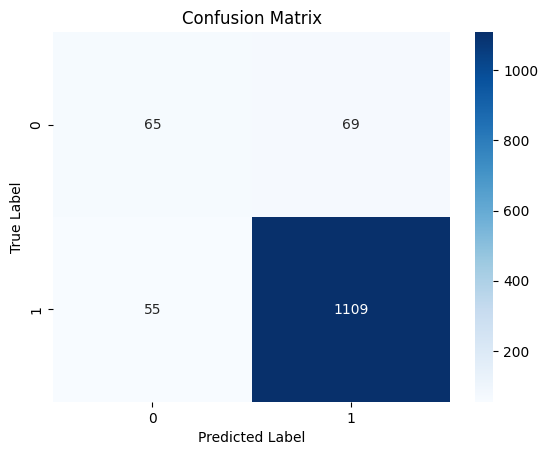

              precision    recall  f1-score   support

           0       0.54      0.49      0.51       134
           1       0.94      0.95      0.95      1164

    accuracy                           0.90      1298
   macro avg       0.74      0.72      0.73      1298
weighted avg       0.90      0.90      0.90      1298



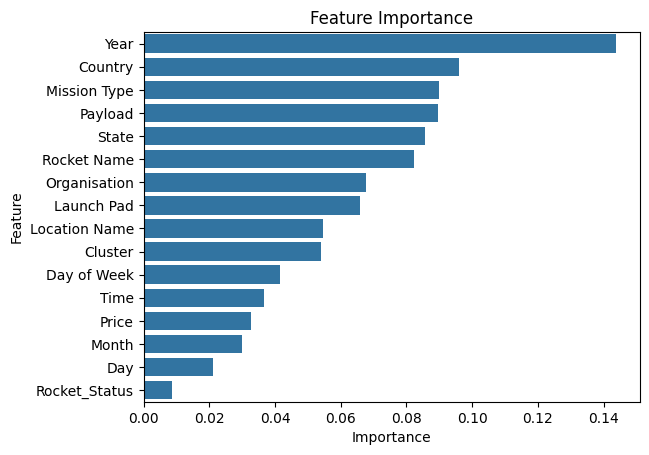

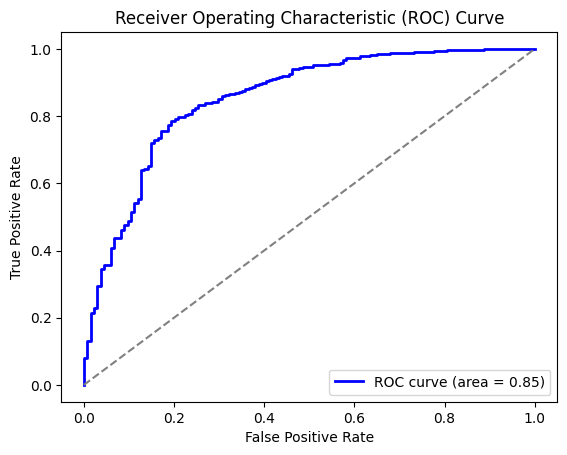

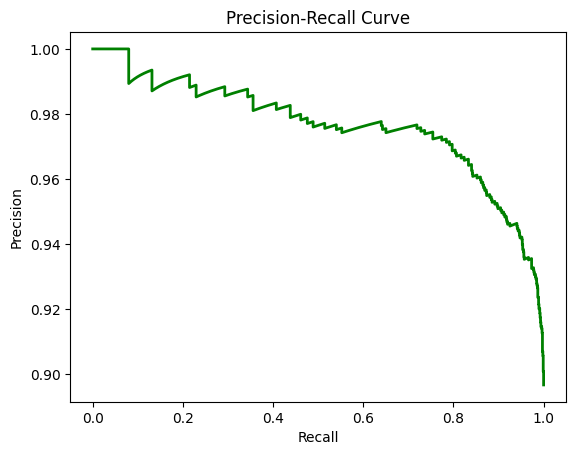

In [197]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inizializzazione del Label Encoder
label_encoders = {}

# Encoding delle variabili categoriche
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salviamo l'encoder per eventuali trasformazioni future

# Gestione dei valori mancanti nella colonna "Price"
imputer = SimpleImputer(strategy="mean")
df["Price"] = imputer.fit_transform(df[["Price"]])

# Definizione della variabile target e delle feature
y = df["Mission_Status"]
X = df.drop(columns=["Mission_Status"])

# Divisione bilanciata in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Impostazione della cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definizione del modello con più parametri di bilanciamento
rf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Definizione della grid search con parametri ampliati
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [4, 5, 6, 7, 8, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
y_pred = grid_search.best_estimator_.predict(X_test)

# Stampa della confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Stampa del classification report
print(classification_report(y_test, y_pred))

# Visualizzazione della feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Curva ROC e AUC
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



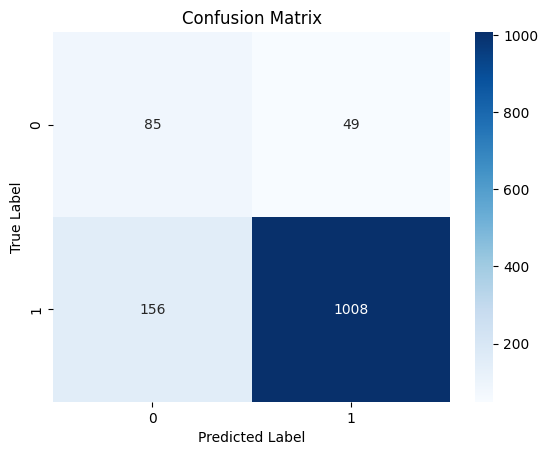

              precision    recall  f1-score   support

           0       0.35      0.63      0.45       134
           1       0.95      0.87      0.91      1164

    accuracy                           0.84      1298
   macro avg       0.65      0.75      0.68      1298
weighted avg       0.89      0.84      0.86      1298



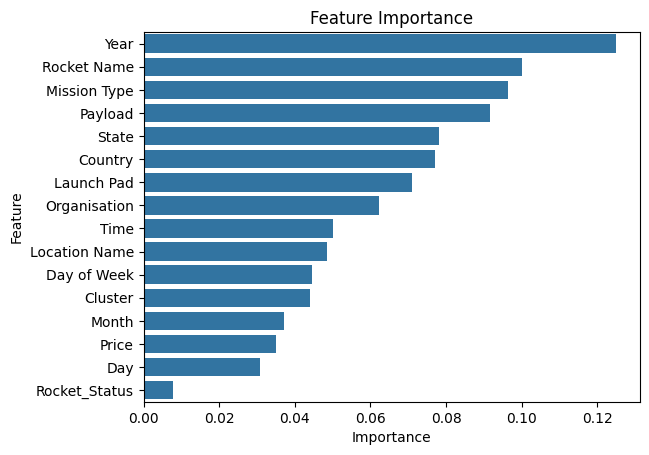

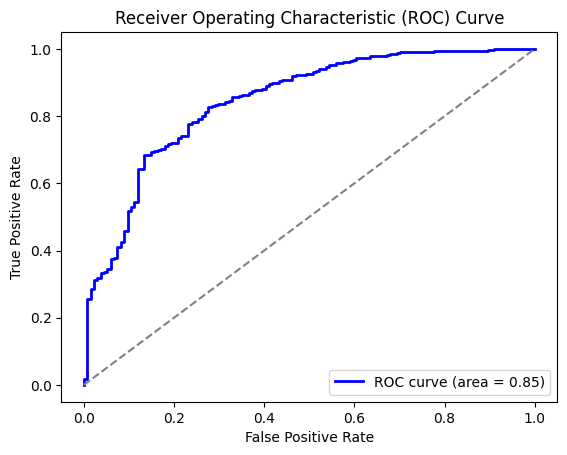

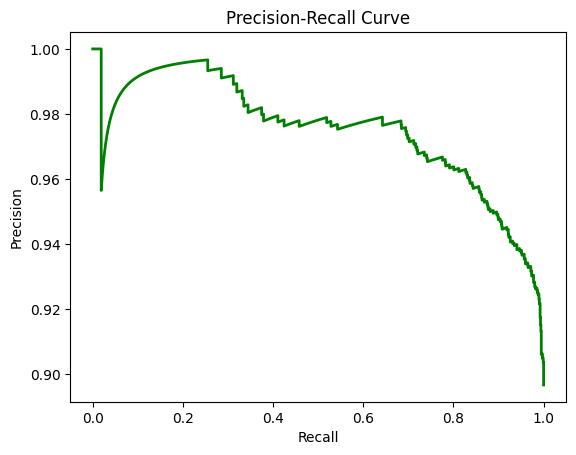

In [198]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inizializzazione del Label Encoder
label_encoders = {}

# Encoding delle variabili categoriche
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Salviamo l'encoder per eventuali trasformazioni future

# Gestione dei valori mancanti nella colonna "Price"
imputer = SimpleImputer(strategy="mean")
df["Price"] = imputer.fit_transform(df[["Price"]])

# Definizione della variabile target e delle feature
y = df["Mission_Status"]
X = df.drop(columns=["Mission_Status"])

# Divisione bilanciata in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Applicazione di SMOTE per bilanciare il dataset
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Impostazione della cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definizione del modello con class_weight bilanciato manualmente
rf = RandomForestClassifier(class_weight={0: 3, 1: 1}, random_state=42)

# Definizione della grid search con parametri ampliati
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [4, 5, 6, 7, 8, 10],
    "min_samples_split": [2, 3, 5],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2'],
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Miglior modello trovato
y_pred = grid_search.best_estimator_.predict(X_test)

# Stampa della confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Stampa del classification report
print(classification_report(y_test, y_pred))

# Visualizzazione della feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Curva ROC e AUC
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()
